# Libraries

In [422]:
from sklearn.datasets import load_sample_image

import numpy as np
import scipy as sp

from sklearn.cluster import AgglomerativeClustering, KMeans, kmeans_plusplus
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import time

# Task 1: Implementing K-Means Algorithm

- Code for the algorithm

In [4]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        """
        # Edge cases
        if not isinstance(data, np.ndarray):
            raise TypeError("Data must be a numpy array")
        if len(data.shape) != 2:
            raise ValueError("Data must be a two-dimensional array")
        
        # Implementation of KMeans algorithm
        np.random.seed(self.random_state)
        # Randomly initialize centroids
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, False)]
        for _ in range(self.max_iterations):
            # Assign clusters
            self.labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2), axis=1)
            # Update centroids
            new_centroids = np.array([data[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
            # Check convergence
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        return self
    
    def predict(self, data, distance_type='euclidean'):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        - distance_type: Type of distance to use for clustering ('euclidean' or 'manhattan').

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        if distance_type == 'manhattan':
            # Use Manhattan distance
            distances = np.sum(np.abs(data[:, np.newaxis] - self.centroids), axis=2)
        else:
            # Use Euclidean distance
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        
        return np.argmin(distances, axis=1)

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids

# Task 2: Complexity Exploration

The time complexity of the provided K-Means implementation is  O(m⋅K⋅I⋅n), where:

- m is the number of data points.

- K is the number of clusters.

- I is the number of iterations until convergence.

- n is the number of attributes (or features) for each data point. ( for image compression n is 3 in colorful images)


Experiments Measuring the Running Time as the Parameters Changes:

Experiment 1-2: Time metrics seem to be consistent across two experiments when measuring distance from Euclidean to Manhattan.

Experiment 1-3: The time metrics seem to show no significant change when the number of iterations increased from 100 to 200.

Experiment 1-4: Time decreases linearly as more data points are used for fitting with a random sample.

Experiment 1-5: Time increases linearly as the number of clusters increases from 2 to 10.


- Data:

In [424]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert it to floats and divide by 255 so that plt.imshow works (need to be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255
china.shape

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)

image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

- 1st Experiment: m = 273280, K = 2 (number of colors), I = 100 (number of iterations), n = 273280 (fitting the data using all the points), type of distance measurement = euclidean distance

In [425]:
n_colors = 2
max_iterations=100

# Start measuring time
start_time = time.time()

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='euclidean distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images

# Time after prediction
predict_time = time.time() - prediction_start_time

print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 0.1671 seconds
Time taken to predict: 0.0139 seconds
Total time taken: 0.1810 seconds


- 2nd Experiment: m = 273280, K = 2 (number of colors), I = 100 (number of iterations), n = 273280 (fitting the data using all the points), type of distance measurement = manhattan distance

In [426]:
n_colors = 2
max_iterations=100

# Start measuring time
start_time = time.time()

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='manhattan distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 0.1563 seconds
Time taken to predict: 0.0131 seconds
Total time taken: 0.1695 seconds


- 3rd Experiment: m = 273280, K = 2 (number of colors), I = 200 (number of iterations), n = 273280 (fitting the data using all the points), type of distance measurement = euclidean distance

In [427]:
n_colors = 2
max_iterations=200

# Start measuring time
start_time = time.time()

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='manhattan distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 0.1620 seconds
Time taken to predict: 0.0149 seconds
Total time taken: 0.1769 seconds


- 4th Experiment: m = 273280, K = 2 (number of colors), I = 100 (number of iterations), n = 1000 (fitting the data using random sample from the data), type of distance measurement = euclidean distance

In [428]:
n_colors = 2
max_iterations=100

# Start measuring time
start_time = time.time()

# creating an image array from sample
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array_sample)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='manhattan distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 0.0042 seconds
Time taken to predict: 0.0165 seconds
Total time taken: 0.0207 seconds


- 5th Experiment: m = 273280, K = 10 (number of colors), I = 100 (number of iterations), n = 273280 (fitting the data using all the points), type of distance measurement = euclidean distance

In [429]:
n_colors = 10
max_iterations=100

# Start measuring time
start_time = time.time()

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='manhattan distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 8.8063 seconds
Time taken to predict: 0.0794 seconds
Total time taken: 8.8857 seconds


- Plots comparing the total run time

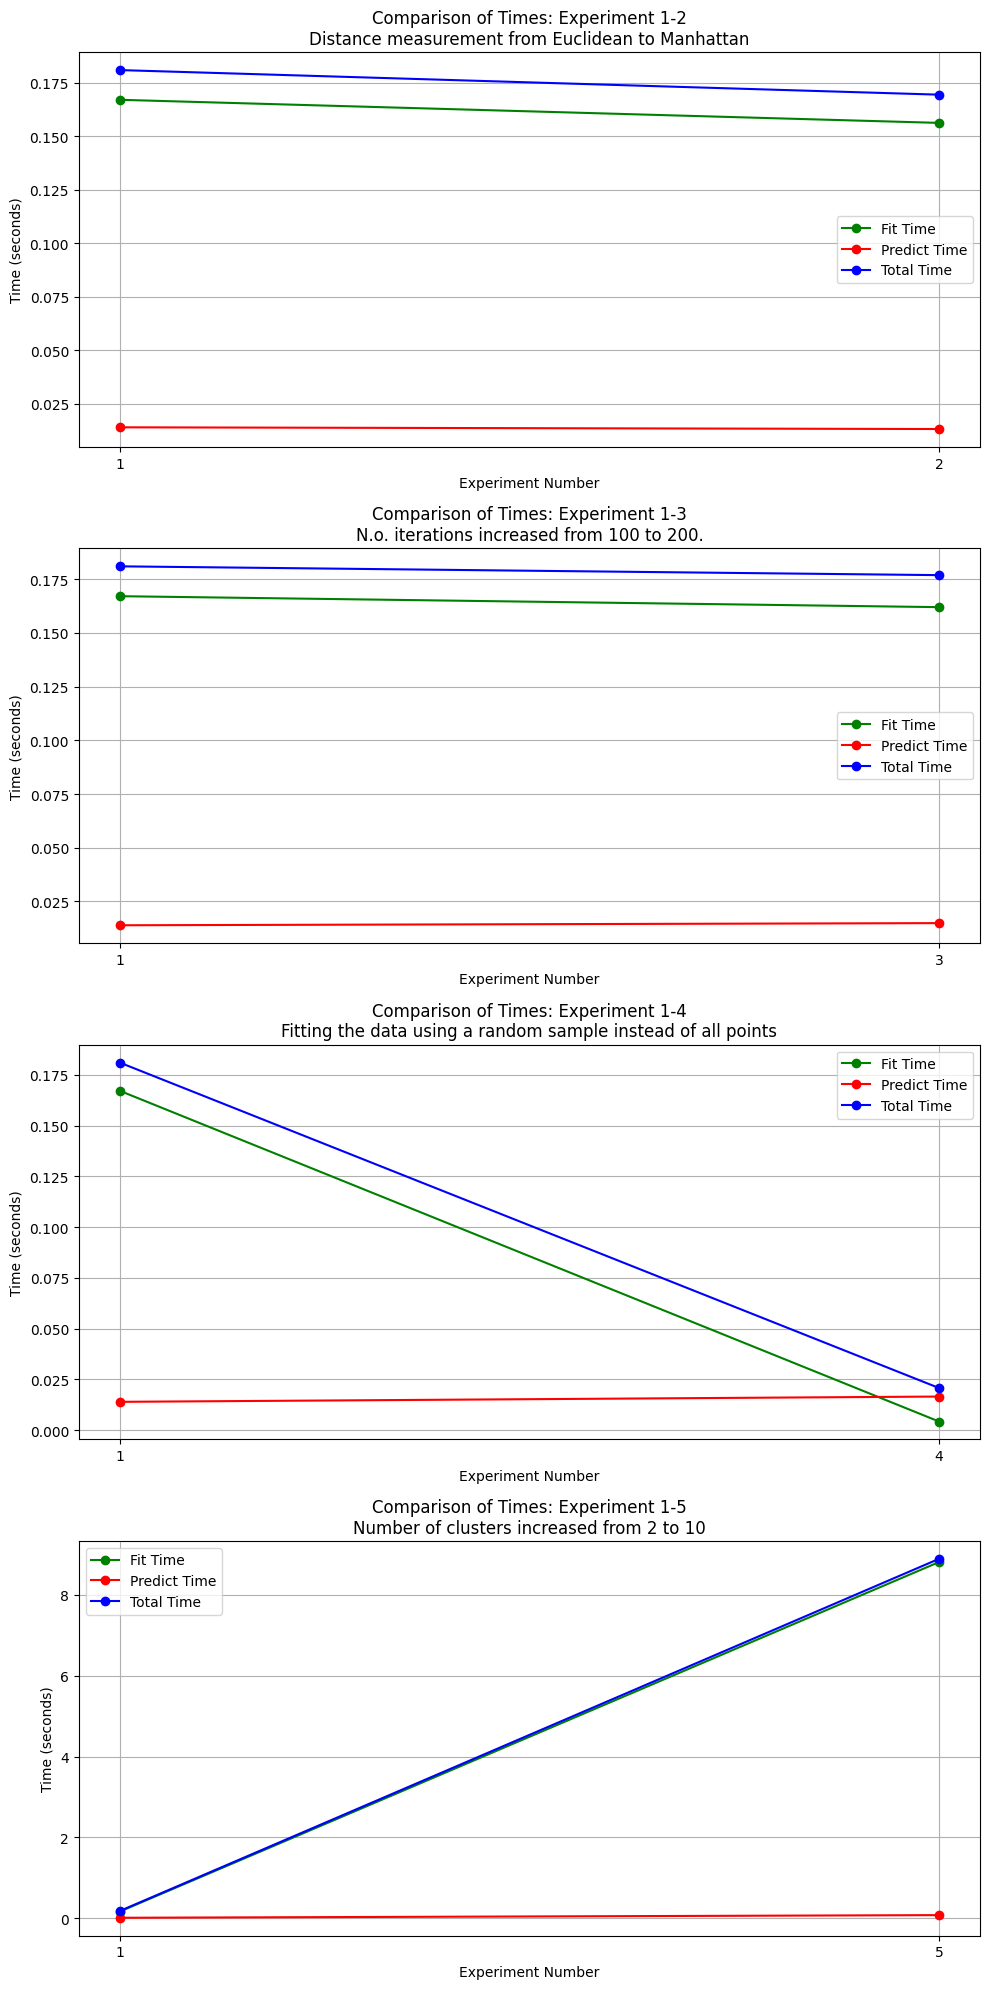

In [443]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Updated data for the experiments based on the new provided values
experiments = {
    '1': {'fit_time': 0.1671, 'predict_time': 0.0139, 'total_time': 0.1810},
    '2': {'fit_time': 0.1563, 'predict_time': 0.0131, 'total_time': 0.1695},
    '3': {'fit_time': 0.1620, 'predict_time': 0.0149, 'total_time': 0.1769},
    '4': {'fit_time': 0.0042, 'predict_time': 0.0165, 'total_time': 0.0207},
    '5': {'fit_time': 8.8063, 'predict_time': 0.0794, 'total_time': 8.8857}
}

# Define the changes for each experiment comparison
changes = [
    "Distance measurement from Euclidean to Manhattan",
    "N.o. iterations increased from 100 to 200.",
    "Fitting the data using a random sample instead of all points",
    "Number of clusters increased from 2 to 10"
]

# Define the comparison groups for the plots
comparison_groups = {
    '1-2': ['1', '2'],
    '1-3': ['1', '3'],
    '1-4': ['1', '4'],
    '1-5': ['1', '5']
}

# Create a figure with subplots in 4 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Plot each comparison
for i, (comparison, exp_nums) in enumerate(comparison_groups.items(), start=1):
    ax = axes[i-1]
    fit_times = [experiments[exp]['fit_time'] for exp in exp_nums]
    predict_times = [experiments[exp]['predict_time'] for exp in exp_nums]
    total_times = [experiments[exp]['total_time'] for exp in exp_nums]
    
    # Plot with lines between points
    ax.plot(exp_nums, fit_times, marker='o', linestyle='-', color='green', label='Fit Time')
    ax.plot(exp_nums, predict_times, marker='o', linestyle='-', color='red', label='Predict Time')
    ax.plot(exp_nums, total_times, marker='o', linestyle='-', color='blue', label='Total Time')
    
    ax.set_title(f'Comparison of Times: Experiment {comparison}\n{changes[i-1]}')
    ax.set_xlabel('Experiment Number')
    ax.set_ylabel('Time (seconds)')
    ax.legend()
    ax.grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


# Task 3 - Image Compression using K-Means

- Getting the data ready, image_array is the variable which contains the pixel x (r,g,b) data points

In [433]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert it to floats and divide by 255 so that plt.imshow works (need to be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255
china.shape

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)

image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

- Fitting the algorithm

In [434]:
n_colors = 2
max_iterations=100

# Start measuring time
start_time = time.time()

# creating an image array from sample
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='euclidean distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 0.1789 seconds
Time taken to predict: 0.0141 seconds
Total time taken: 0.1930 seconds


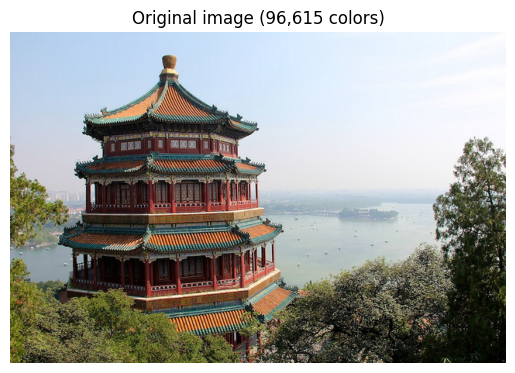

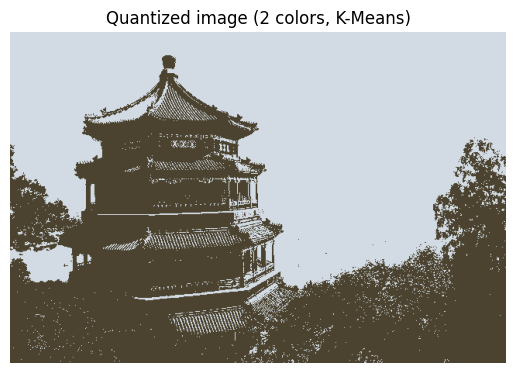

In [435]:
# Get labels for all points
labels = kmeans.predict(image_array)

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

# Get labels for all points
labels = kmeans.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.centroids, labels, w, h))

In [436]:
n_colors = 10
max_iterations=100

# Start measuring time
start_time = time.time()

# creating an image array from sample
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

# fitting the algorithm as kmeans
kmeans = KMeans(n_clusters=n_colors, max_iterations=max_iterations, random_state=0).fit(image_array)

# Time after fitting
fit_time = time.time() - start_time

prediction_start_time = time.time()

# assigning labels to each point
labels = kmeans.predict(image_array, distance_type='euclidean distance')

# kmeans centroids is the location of the centroids in the color space, it will be n.o. colors x 3 in the colorful images
# kmeans.centroids

# Time after prediction
predict_time = time.time() - prediction_start_time

# Print the times
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(f"Time taken to predict: {predict_time:.4f} seconds")
print(f"Total time taken: {(fit_time+ predict_time):.4f} seconds")

Time taken to fit the model: 8.6974 seconds
Time taken to predict: 0.0847 seconds
Total time taken: 8.7821 seconds


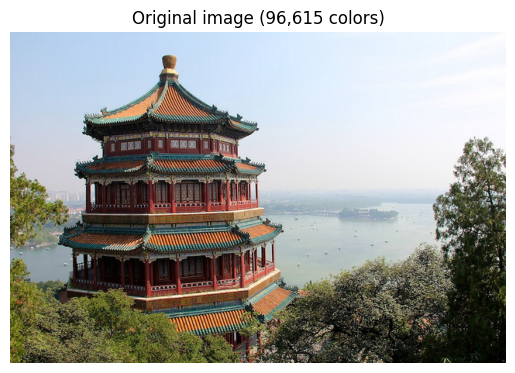

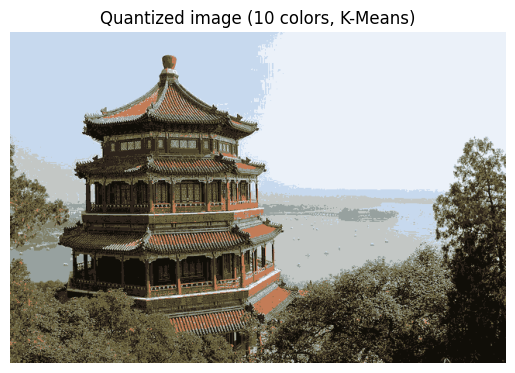

In [437]:
# Get labels for all points
labels = kmeans.predict(image_array)

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

# Get labels for all points
labels = kmeans.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.centroids, labels, w, h))

- As the number of clusters increases, images get more colorful, and the color transitions between pixels get smoother, causing an overall decrease in the contrast.

# Unit Tests Using Sklearn Kmeans

In [13]:
import unittest
import numpy as np
from sklearn.cluster import KMeans as SklearnKMeans

class TestKMeans(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        # Set up once for all tests
        np.random.seed(42)
        cls.data = np.random.rand(1000, 2)  # 1000 data points in 2D space
        cls.custom_kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=42)
        cls.sklearn_kmeans = SklearnKMeans(n_clusters=3, max_iter=100, random_state=42)
        cls.custom_kmeans.fit(cls.data)
        cls.sklearn_kmeans.fit(cls.data)
    
    def test_custom_labels_length(self):
        self.assertEqual(len(self.custom_kmeans.labels), len(self.sklearn_kmeans.labels_), "The number of labels is not equal for both.")
    
    def test_custom_centroids_number(self):
        self.assertEqual(len(self.custom_kmeans.centroids), len(self.sklearn_kmeans.cluster_centers_), "The number of centroids is not equal for both.")   

def run_tests():
    # Create a test suite combining all the tests
    suite = unittest.TestLoader().loadTestsFromTestCase(TestKMeans)
    
    # Run the test suite
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)
    
    # Check if all tests passed
    if result.wasSuccessful():
        print("All the assertions above passed!")
    else:
        print("Some tests failed.")

# Run the tests
run_tests()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
test_custom_centroids_number (__main__.TestKMeans.test_custom_centroids_number) ... ok
test_custom_labels_length (__main__.TestKMeans.test_custom_labels_length) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.035s

OK


All the assertions above passed!


In [14]:
# Assertion to check if at least 950 points out of 1000 have their centroids close enough
# between custom and sklearn's KMeans
import numpy as np
from sklearn.cluster import KMeans as SklearnKMeans

np.random.seed(42)
data = np.random.rand(1000, 2)  # 1000 data points in 2D space

# Fit the custom KMeans
custom_kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=42)
custom_kmeans.fit(data)

sklearn_kmeans = SklearnKMeans(n_clusters=3, max_iter=100, random_state=42)
sklearn_kmeans.fit(data)

matches = sum(np.allclose(custom_kmeans.centroids[label], sklearn_kmeans.cluster_centers_[sklearn_label], atol=1e-1)
              for label, sklearn_label in zip(custom_kmeans.labels, sklearn_kmeans.labels_))
assert matches >= 950, f"Less than 950 points ({matches}) have matching centroids."

print("Assertion for at least 950 matching centroids passed!")

Assertion for at least 950 matching centroids passed!


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
